In [87]:

a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1,
   ]
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   ]
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0,
   ]

In [88]:
y=[[1,0,0],
   [0,1,0],
   [0,0,1],
   ]

In [89]:
import numpy as np
import matplotlib.pyplot as plt


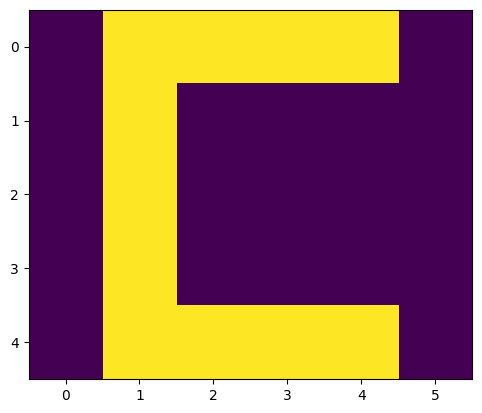

In [90]:
plt.imshow(np.array(c).reshape(5,6))

In [91]:

y=np.array(y)
y

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [92]:
x=[np.array(a).reshape(5,6),np.array(b).reshape(5,6),np.array(c).reshape(5,6)]
x

[array([[0, 0, 1, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 1]]),
 array([[0, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 1, 1, 1, 1, 0]]),
 array([[0, 1, 1, 1, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0]])]

In [93]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [94]:
def f_forward(x,w1,w2):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=a1.dot(w2)
    a2=sigmoid(z2)
    return a2

In [95]:
def generate_w(x, y):
    l = []
    for i in range(x * y):
        l.append(np.random.rand())
    return np.array(l).reshape(x, y)

In [96]:
def loss_list(out,y):
    
    s=(np.square(out-y))
    s=np.sum(s)/len(s)
    return s
    

In [97]:
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)           
    a1 = sigmoid(z1)           
    z2 = a1.dot(w2)          
    a2 = sigmoid(z2)           
    d2 = (a2 - y) * (a2 * (1 - a2))    
    d1 = (d2.dot(w2.T)) * (a1 * (1 - a1))  
    w1_adj = np.outer(x, d1)   
    w2_adj = np.outer(a1, d2)  
    w1 = w1 - alpha * w1_adj
    w2 = w2 - alpha * w2_adj
    return w1, w2

In [98]:
def train(x, y, w1, w2, alpha, epochs):
    acc = []
    losses = []
    for epoch in range(epochs):
        l = []
        for i in range(len(x)):
            xi = x[i].reshape(-1)  
            out = f_forward(xi, w1, w2)
            l.append(loss_list(out, y[i]))  
            w1, w2 = back_prop(xi, y[i], w1, w2, alpha)
        losses.append(sum(l)/len(l))
        acc.append(1 - (sum(l)/len(l)))
        print("epoch:", epoch+1, "loss:", losses[-1])
    return acc, losses, w1, w2

In [99]:
def predict(x,w1,w2):
    out=f_forward(x,w1,w2)
    max=0
    k=0
    for i in range(len(out[0])):
        if(max<out[0][i]):
            max=out[0][i]
            k=i
    if(k==0):
        print("predicted a")
    elif(k==1):
        print("predicted b")
    else:
        print("predicted c")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [100]:
w1=generate_w(30,5)
w2=generate_w(5,3)
print(w1,w2)


[[0.21574669 0.93039242 0.96695987 0.57168962 0.56469825]
 [0.23435271 0.27367235 0.32526526 0.59502824 0.11663615]
 [0.21154824 0.46508727 0.54444541 0.20102226 0.88401084]
 [0.94293086 0.82995463 0.97510649 0.29681976 0.67287967]
 [0.97564378 0.785059   0.12869169 0.11727118 0.33126388]
 [0.4199697  0.17871877 0.18165462 0.64074695 0.39233155]
 [0.75286322 0.3094529  0.30327384 0.69150517 0.37291623]
 [0.77295808 0.32825621 0.45037619 0.65015227 0.78252472]
 [0.37418892 0.01544214 0.36422163 0.24514894 0.80581116]
 [0.55441111 0.61224951 0.95616653 0.76202865 0.87627118]
 [0.82729813 0.27401843 0.50793378 0.50574124 0.493202  ]
 [0.06670132 0.10674078 0.96106939 0.73469142 0.26153063]
 [0.52086443 0.12815456 0.44527296 0.32369006 0.31952986]
 [0.56809034 0.75531256 0.61187625 0.77556794 0.68000465]
 [0.99295159 0.42076701 0.08585292 0.11036189 0.58337444]
 [0.34745748 0.03113608 0.27929095 0.78808194 0.35584759]
 [0.05017934 0.6676159  0.48328203 0.47843799 0.88405573]
 [0.61520635 0

In [101]:
acc,loss_list,w1,w2=train(x,y,w1,w2,0.1,100)

epoch: 1 loss: 0.5521679435307334
epoch: 2 loss: 0.5450011770339415
epoch: 3 loss: 0.5371295659812634
epoch: 4 loss: 0.5284847456681585
epoch: 5 loss: 0.5189998782807675
epoch: 6 loss: 0.5086145027657825
epoch: 7 loss: 0.49728132461921165
epoch: 8 loss: 0.48497502015260086
epoch: 9 loss: 0.4717026407181335
epoch: 10 loss: 0.4575144228299237
epoch: 11 loss: 0.44251285076147123
epoch: 12 loss: 0.42685704218512716
epoch: 13 loss: 0.41075954416782334
epoch: 14 loss: 0.3944740142493229
epoch: 15 loss: 0.37827500820883525
epoch: 16 loss: 0.36243415014181557
epoch: 17 loss: 0.3471985375456786
epoch: 18 loss: 0.33277607086739747
epoch: 19 loss: 0.3193290066176924
epoch: 20 loss: 0.30697358150545573
epoch: 21 loss: 0.29578218895084696
epoch: 22 loss: 0.2857857332612576
epoch: 23 loss: 0.2769760052210804
epoch: 24 loss: 0.2693093367144494
epoch: 25 loss: 0.2627125993795066
epoch: 26 loss: 0.25709140527851104
epoch: 27 loss: 0.2523392706302336
epoch: 28 loss: 0.24834618832098498
epoch: 29 loss: 0

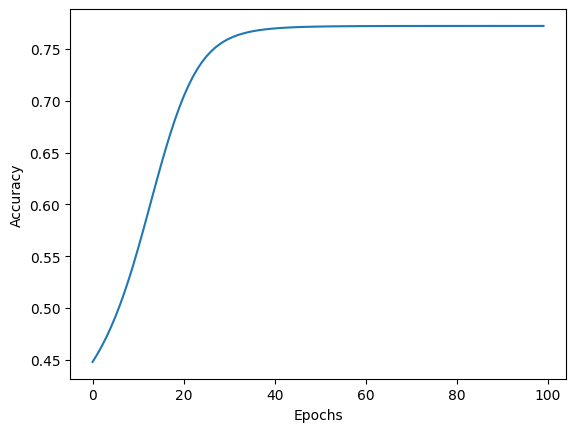

In [102]:
plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


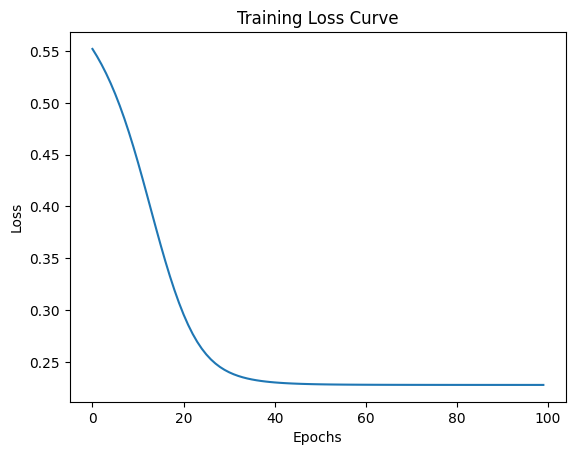

In [103]:
import matplotlib.pyplot as plt
plt.plot(loss_list)  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


In [104]:
print(w1,w2)

[[0.21574669 0.93039242 0.96695987 0.57168962 0.56469825]
 [0.23182785 0.27449803 0.3246494  0.59600394 0.11638305]
 [0.20993608 0.4661273  0.54343339 0.20018029 0.88370376]
 [0.94131871 0.83099467 0.97409447 0.29597779 0.67257259]
 [0.97311892 0.78588468 0.12807583 0.11824688 0.33101078]
 [0.4199697  0.17871877 0.18165462 0.64074695 0.39233155]
 [0.75286322 0.3094529  0.30327384 0.69150517 0.37291623]
 [0.77134593 0.32929624 0.44936417 0.64931031 0.78221764]
 [0.37418892 0.01544214 0.36422163 0.24514894 0.80581116]
 [0.55441111 0.61224951 0.95616653 0.76202865 0.87627118]
 [0.82786758 0.27415409 0.50813609 0.5040384  0.49312572]
 [0.06670132 0.10674078 0.96106939 0.73469142 0.26153063]
 [0.52177714 0.12836892 0.4448768  0.32187239 0.31947588]
 [0.56647819 0.75635259 0.61086423 0.77472598 0.67969756]
 [0.99352103 0.42090267 0.08605522 0.10865905 0.58329816]
 [0.34802692 0.03127174 0.27949326 0.7863791  0.35577131]
 [0.05074879 0.66775156 0.48348433 0.47673515 0.88397945]
 [0.61611905 0